## Assigment 1

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [351]:
df = pd.read_csv('Ruter_data.csv', delimiter = ";")

In [352]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


### 1) Ønsker å finne ut hva som er vanligste antall passasjerer på bussene

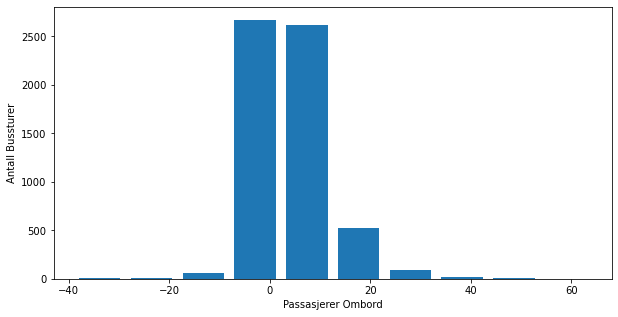

In [353]:
plt.figure(figsize=[10,5])
plt.hist(df.Passasjerer_Ombord, bins=10, rwidth=0.8)
plt.xlabel('Passasjerer Ombord')
plt.ylabel('Antall Bussturer')
plt.show()

In [354]:
thresold_max = df['Passasjerer_Ombord'].quantile(0.90)
thresold_min = df['Passasjerer_Ombord'].quantile(0.10)
new_df = df[(df['Passasjerer_Ombord']<thresold_max) & (df['Passasjerer_Ombord']>thresold_min)]
print(new_df.shape[0])

4695


In [355]:
diff = df.shape[0]-new_df.shape[0]
print('Fjernet ' + str(diff) + ' elementer')

Fjernet 1305 elementer


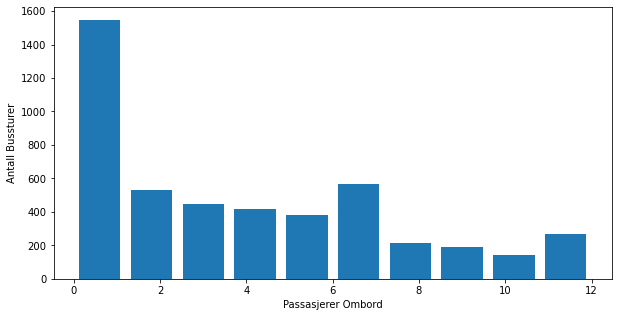

In [356]:
plt.figure(figsize=[10,5])
plt.hist(new_df['Passasjerer_Ombord'], bins=10, rwidth=0.8)
plt.xlabel('Passasjerer Ombord')
plt.ylabel('Antall Bussturer')
plt.show()

### 2) Ønsker å finne ut hva som er vanligste kapasitet på bussene

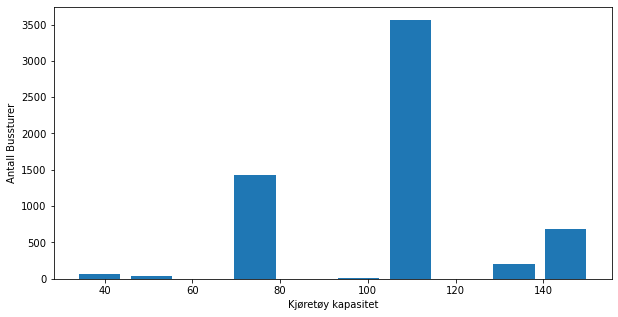

In [357]:
plt.figure(figsize=[10,5])
plt.hist(df.Kjøretøy_Kapasitet, bins=10, rwidth=0.8)
plt.xlabel('Kjøretøy kapasitet')
plt.ylabel('Antall Bussturer')
plt.show()

In [358]:
thresold_max = df['Kjøretøy_Kapasitet'].quantile(0.90)
thresold_min = df['Kjøretøy_Kapasitet'].quantile(0.10)
new_df = df[(df['Kjøretøy_Kapasitet']<thresold_max) & (df['Kjøretøy_Kapasitet']>thresold_min)]
print(new_df.shape[0])

4404


In [359]:
diff = df.shape[0]-new_df.shape[0]
print('Fjernet ' + str(diff) + ' elementer')

Fjernet 1596 elementer


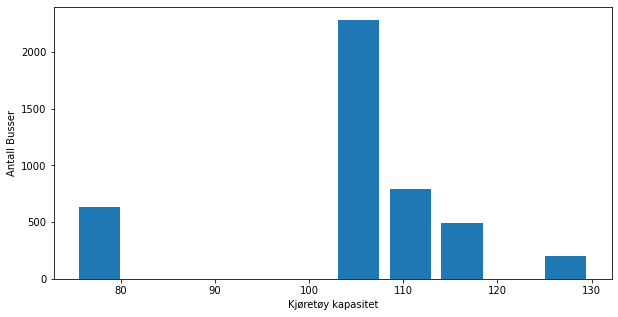

In [360]:
plt.figure(figsize=[10,5])
plt.hist(new_df['Kjøretøy_Kapasitet'], bins=10, rwidth=0.8)
plt.xlabel('Kjøretøy kapasitet')
plt.ylabel('Antall Busser')
plt.show()

### 3) Ønsker å finne vanligste busslinje av 100 busser

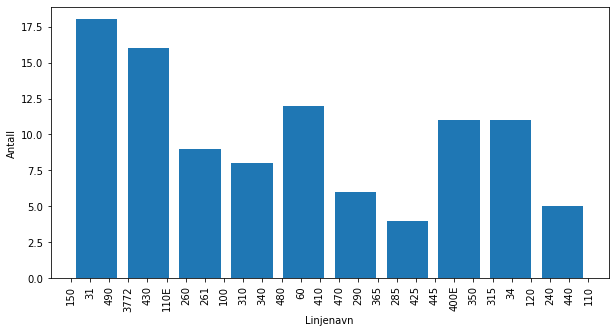

In [388]:
plt.figure(figsize=[10,5])
plt.hist(df.Linjenavn[:100], bins=10, rwidth=0.8)
plt.xlabel('Linjenavn')
plt.ylabel('Antall')
plt.xticks(rotation=90)
plt.show()

### 4) Ønsker å finne vanligste Fylke 

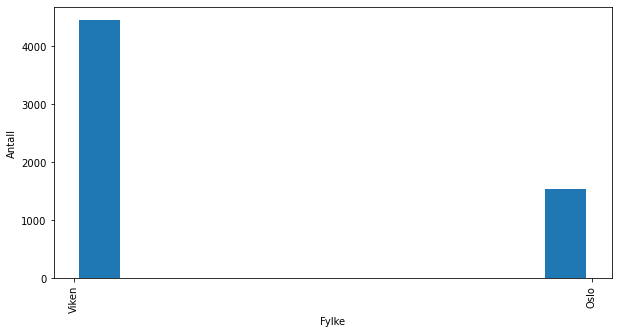

In [391]:
plt.figure(figsize=[10,5])
plt.hist(df.Fylke, bins=10, rwidth=0.8)
plt.xlabel('Fylke')
plt.ylabel('Antall')
plt.xticks(rotation=90)
plt.show()

In [401]:
f1 = df.Fylke
Viken = 0
Oslo = 0

for x in range(6000):
    if df.Fylke[x]=='Viken':
        Viken = Viken+1
    else:
        Oslo = Oslo+1

new_f1 = Viken
print("Viken er den vanligste Fylke med " + str(new_f1) + " busser. Fjerner elementer " + str(Oslo) + " fra datasettet")

Viken er den vanligste Fylke med 4462 busser. Fjerner elementer 1538 fra datasettet


### Ønsker å finne vanligste Kommune ( sample = 20 )

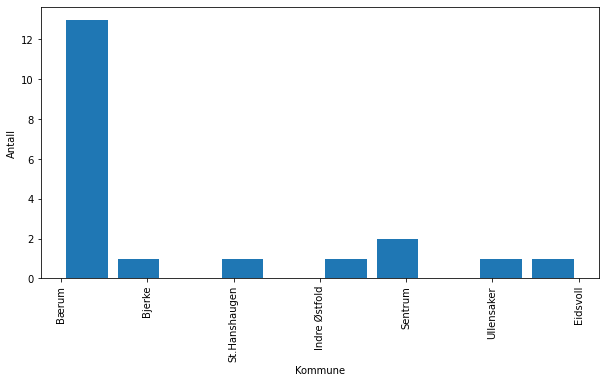

In [403]:
plt.figure(figsize=[10,5])
plt.hist(df.Kommune[:20], bins=10, rwidth=0.8)
plt.xlabel('Kommune')
plt.ylabel('Antall')
plt.xticks(rotation=90)
plt.show()

In [405]:
f1 = df.Kommune
Bærum = 0
Bjerke = 0
St_Hanshaugen = 0
Indre_Ostfold = 0
Sentrum = 0
Ullensaker = 0
Eidsvoll = 0

for x in range(6000):
    if df.Kommune[x]=='Bærum':
        Bærum = Bærum+1
    elif df.Kommune[x]=='Bjerke':
        Bjerke = Bjerke+1
    elif df.Kommune[x]=='St_Hanshaugen':
        St_Hanshaugen = St_Hanshaugen+1
    elif df.Kommune[x]=='Indre_Ostfold':
        Indre_Ostfold = Indre_Ostfold+1
    elif df.Kommune[x]=='Sentrum':
        Sentrum = Sentrum+1
    elif df.Kommune[x]=='Ullensaker':
        Ullensaker = Ullensaker+1
    else:
        Eidvoll = Eidsvoll+1

Kommune = np.array([Bærum,Bjerke,St_Hanshaugen,Indre_Ostfold,Sentrum,Ullensaker,Eidsvoll])

print(Kommune)
print("Ser at Bærum har flest tilfeller. Fjerner de andre i en ny variabel med navn vanligste Kommune")

[724 199   0   0  77 358   0]
Ser at Bærum har flest tilfeller. Fjerner de andre i en ny variabel med navn vanligste Kommune
